<a href="https://colab.research.google.com/github/ly-collaps/A-ramjet-parameters-analysis/blob/main/ITC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Ragression

### Model building

In [1]:
import numpy as np

class GradientDescentLinearRegression:
    
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
       
    
    def fit(self, X, y):
        b = 0
        m = 5
        loss = []
        ms = []
        bs = []
        n = X.shape[0]
        for _ in range(self.iterations):
            loss.append(np.sum((y-(m*X+b))**2))
            ms.append(m)
            bs.append(b)
            b_gradient = -2 * np.sum(y - (m*X + b))/n
            m_gradient = -2 * np.sum(X*(y - (m*X + b)))/n
            b = b - (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        self.loss = np.array(loss)
        self.ms = np.array(ms)
        self.bs=np.array(bs)
        
    def predict(self, X):
        return self.m*X + self.b

### Data generation

In [2]:
np.random.seed(103)
X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)

### Data Visualisation

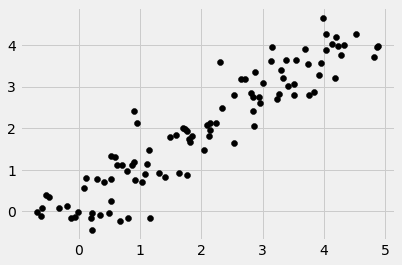

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.scatter(X, y, color='black')

### Model training

Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

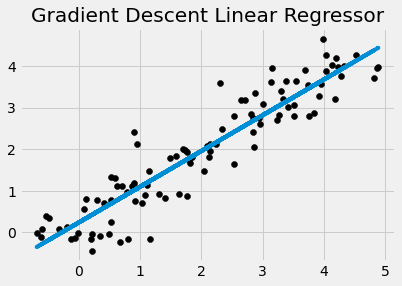

In [4]:
clf = GradientDescentLinearRegression()
clf.fit(X, y)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(X, y, color='black')
plt.plot(X, clf.predict(X))
plt.gca().set_title("Gradient Descent Linear Regressor")

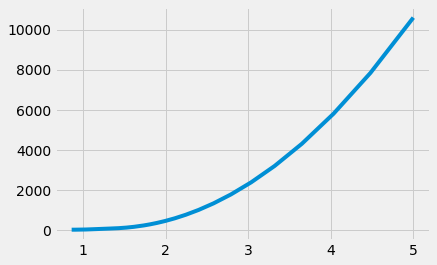

In [5]:
plt.plot(clf.ms, clf.loss)

### (More)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


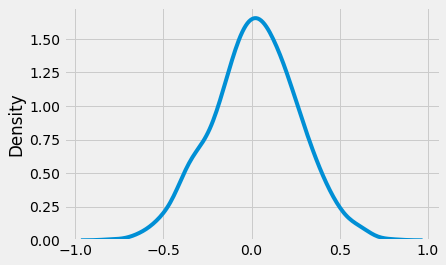

In [6]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.normal(size=1000,scale=0.25), hist=False)

plt.show()

# Decision Tree

### Preparing data


In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [6]:
# Loading Data
df = pd.read_csv("diabetes.csv")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Features and labels selection
x = df.drop(columns='Outcome',axis=1)
feature_cols = x.columns
X = df[feature_cols]
Y = df['Outcome']
labels = ['0', '1']

In [9]:
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)

### Building Decision Tree Model

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth = 5)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(x_test)

# Evaluation
print(metrics.accuracy_score(y_test, y_pred))

0.7597402597402597


### Visualizing Decision Tree

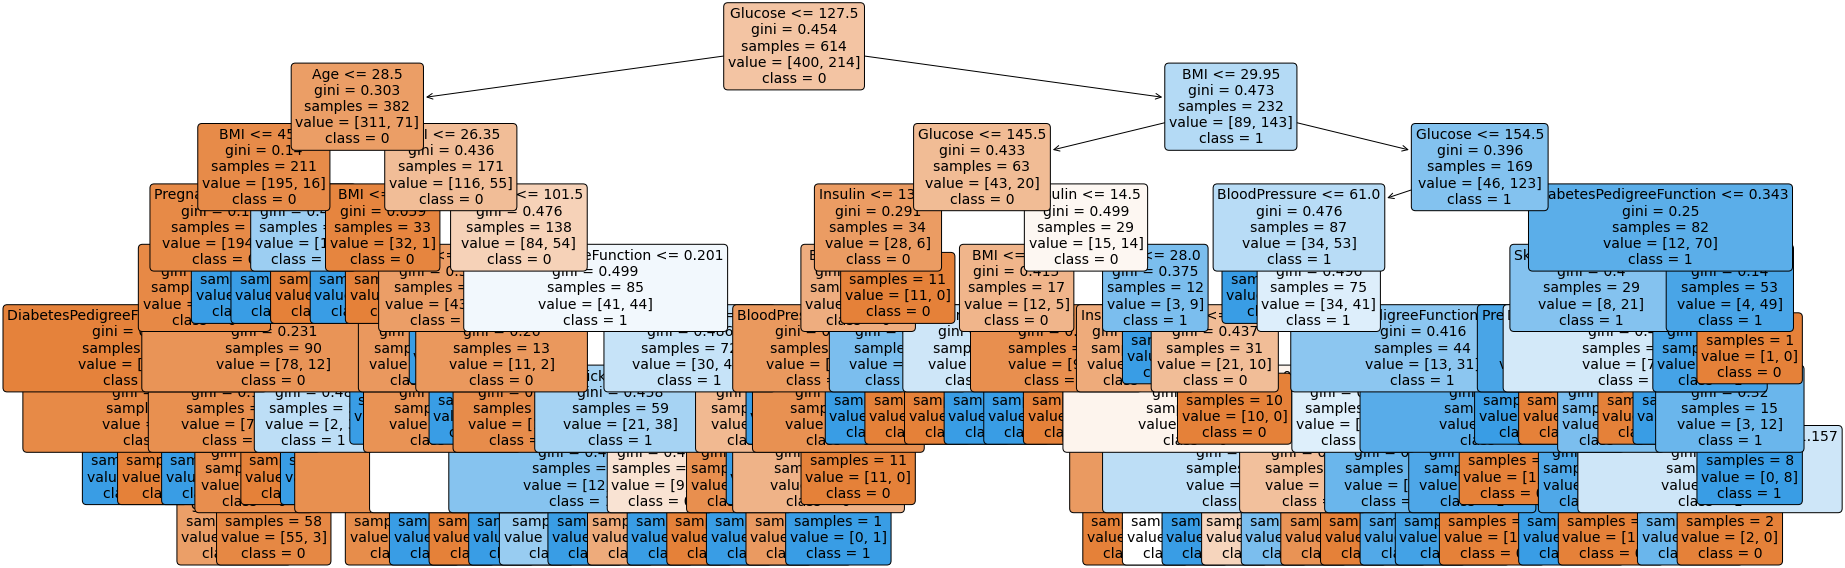

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(30,10))
a = tree.plot_tree(clf, feature_names=feature_cols, class_names=labels, rounded = True, filled = True, fontsize=14)
plt.show()                  

# K-means

### Preparing Data

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns

#Create data frame
df = pd.read_csv('kmeans_blobs.csv')
df.head()

,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


### Data Visualisation

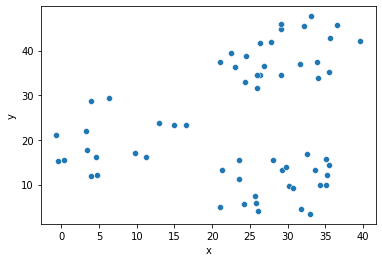

In [3]:
sns.scatterplot(x='x', y='y', data = df)

### Running K-means

In [5]:
from scipy.cluster.vq import kmeans, vq,whiten

#Generate cluster centers 
cluster_centers, distortion = kmeans(obs=df[['x','y']],k_or_guess=3)

#Generate cluster labels
df['cluster'], distortion_list = vq(df[['x','y']],cluster_centers)

In [6]:
df.head()

,ID,x,y,cluster
0,0,24.412,32.932,1
1,1,35.190,12.189,0
2,2,26.288,41.718,1
3,3,0.376,15.506,2
4,4,26.116,3.963,0


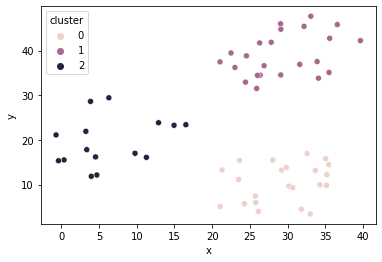

In [7]:
sns.scatterplot(x='x', y='y', 
                hue='cluster', data = df)

In [8]:
print(distortion)

6.418413675135714


### Elbow method

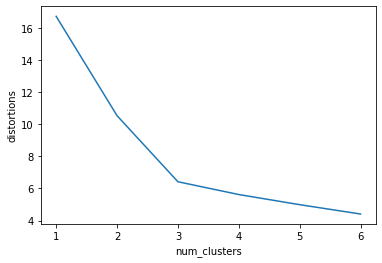

In [9]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['x', 'y']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters,'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions',data = elbow_plot)